In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv').head(1000)   # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,u1,u2,u3,u4,u5,u6,u7,u8,...,u219,u220,u221,u222,u223,u224,u225,u226,u227,u228
0,1,"['u62', ' u17', ' u66', ' u214', ' u105', ' u1...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"['u95', ' u17', ' u66', ' u214', ' u164', ' u1...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"['u122', ' u19', ' u66', ' u186', ' u180', ' u...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"['u190', ' u222', ' u66', ' u153', ' u164', ' ...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,"['u62', ' u66', ' u153', ' u171', ' u111', ' u...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.columns

Index(['Id', 'Genre', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8',
       ...
       'u219', 'u220', 'u221', 'u222', 'u223', 'u224', 'u225', 'u226', 'u227',
       'u228'],
      dtype='object', length=225)

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+str(train['Id'][i])+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1000/1000 [00:04<00:00, 218.87it/s]


In [5]:
X.shape

(1000, 400, 400, 3)

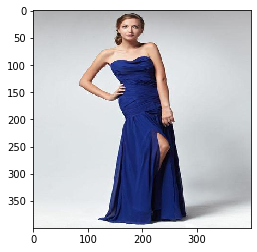

In [6]:
plt.imshow(X[2])

In [7]:
train['Genre'][2]

"['u122', ' u19', ' u66', ' u186', ' u180', ' u44', ' u154', ' u20']"

In [8]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))


In [9]:
y.shape

(1000, 223)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(223, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test), batch_size=10)

Train on 900 samples, validate on 100 samples
Epoch 1/4
900/900 [==============================] - 102s 114ms/step - loss: 0.3086 - accuracy: 0.8673 - val_loss: 0.1528 - val_accuracy: 0.9667
Epoch 2/4
900/900 [==============================] - 105s 116ms/step - loss: 0.1375 - accuracy: 0.9630 - val_loss: 0.1096 - val_accuracy: 0.9667
Epoch 3/4
900/900 [==============================] - 105s 116ms/step - loss: 0.1295 - accuracy: 0.9646 - val_loss: 0.1084 - val_accuracy: 0.9667
Epoch 4/4
900/900 [==============================] - 105s 117ms/step - loss: 0.1230 - accuracy: 0.9656 - val_loss: 0.1077 - val_accuracy: 0.9667


In [15]:
img = image.load_img('3001.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

u66 (0.722)
u17 (0.462)
u105 (0.423)


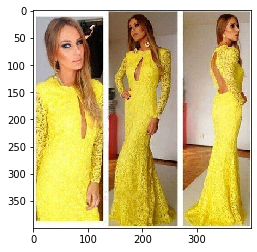

In [16]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)